In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [36]:
df = pd.read_csv('dados_limpos.csv', encoding ='latin1',parse_dates=['DATA'])

In [37]:
df.head()

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,MAIOR_QUE_100
0,2016,1,13,ACIR GURGACZ,Aluguel de imóveis,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01-13,Despesa com pagamento de energia elétrica para...,73.60,0
1,2016,1,18,ACIR GURGACZ,Aluguel de imóveis,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01-18,Pagamento de energia elétrica para o escritóri...,206.84,1
2,2016,1,1,ACIR GURGACZ,Aluguel de imóveis,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00,1
3,2016,1,16,ACIR GURGACZ,Aluguel de imóveis,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48,1
4,2016,1,1,ACIR GURGACZ,Aquisição de material,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06-01,Aquisição de publicação virtual de conteúdo jo...,550.00,1


In [38]:
df.dtypes

ANO                           int64
MES                           int64
DIA                           int64
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DOCUMENTO                    object
DATA                 datetime64[ns]
DETALHAMENTO                 object
VALOR_REEMBOLSADO           float64
MAIOR_QUE_100                 int64
dtype: object

In [39]:
df.describe()

,ANO,MES,DIA,VALOR_REEMBOLSADO,MAIOR_QUE_100
count,26691.0,26691.000000,26691.000000,26691.000000,26691.000000
mean,2016.0,6.470908,15.431419,947.484513,0.784085
std,0.0,3.257134,8.847378,2733.820037,0.411464
min,2016.0,1.000000,1.000000,0.010000,0.000000
25%,2016.0,4.000000,8.000000,124.000000,1.000000
50%,2016.0,6.000000,15.000000,324.790000,1.000000
75%,2016.0,9.000000,23.000000,956.865000,1.000000
max,2016.0,12.000000,31.000000,256980.000000,1.000000


In [40]:
df[df['VALOR_REEMBOLSADO'] == 256980]

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,MAIOR_QUE_100
4637,2016,12,22,DAVI ALCOLUMBRE,Publicidade,04.953.008/0001-23,ARTE & IMAGEM GRAFICA E EDITORA EIRELI ME,202,2017-03-22,NaN,256980.0,1


In [18]:
senadores_com_mais_gastos = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum()

In [19]:
senadores_com_mais_gastos = senadores_com_mais_gastos.sort_values(ascending = False)

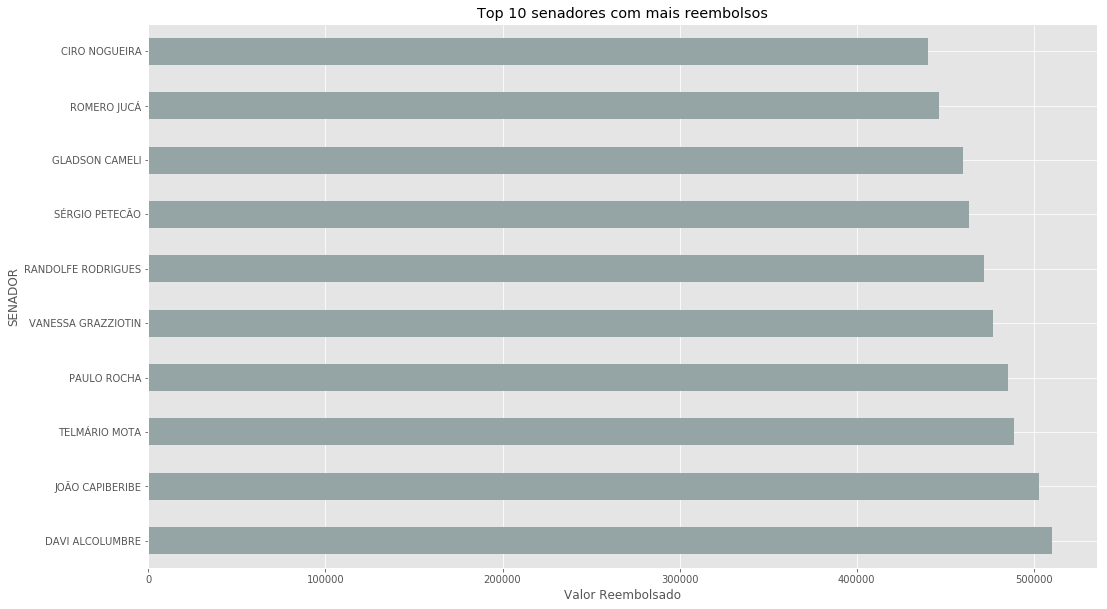

In [35]:
senadores_com_mais_gastos.head(10).plot(kind='barh', color ='#95a5a6', figsize = (17,10))
plt.title('Top 10 senadores com mais reembolsos')
plt.xlabel('Valor Reembolsado')
plt.savefig('top_10_senadores.png')
plt.show()

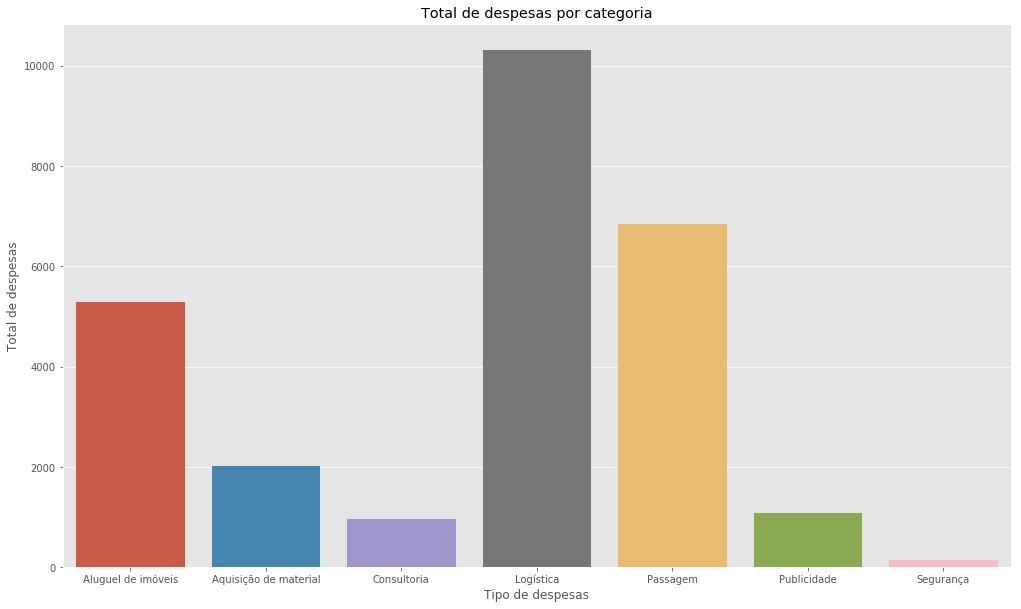

In [43]:
plt.figure(figsize=(17,10))
sns.countplot(x=df['TIPO_DESPESA'])
plt.title('Total de despesas por categoria')
plt.ylabel('Total de despesas')
plt.xlabel('Tipo de despesas')
plt.show()

In [52]:
df['DATA'].dt.strftime('%Y-%m')

0        2016-01
1        2016-01
2        2016-04
3        2016-01
4        2016-06
5        2016-01
6        2016-01
7        2016-01
8        2016-01
9        2016-01
10       2016-01
11       2016-08
12       2016-01
13       2016-01
14       2016-02
15       2016-02
16       2016-03
17       2016-06
18       2016-02
19       2016-02
20       2016-11
21       2016-02
22       2016-02
23       2016-02
24       2016-02
25       2016-01
26       2016-02
27       2016-02
28       2016-02
29       2016-08
          ...   
26661    2016-12
26662    2016-10
26663    2016-12
26664    2016-05
26665    2016-09
26666    2016-10
26667    2016-12
26668    2016-12
26669    2016-12
26670    2016-12
26671    2016-06
26672    2016-09
26673    2016-12
26674    2016-12
26675    2016-12
26676    2016-09
26677    2016-12
26678    2016-12
26679    2016-12
26680    2016-05
26681    2016-07
26682    2016-12
26683    2016-12
26684    2016-12
26685    2016-12
26686    2016-12
26687    2016-12
26688    2016-

In [54]:
df['ANO_MES'] = df['DATA'].dt.strftime('%Y-%m')

In [68]:
pivot_df = df.pivot_table(index='ANO_MES',
               columns='TIPO_DESPESA',
               values='VALOR_REEMBOLSADO',
               aggfunc=np.sum,
               fill_value=0)
pivot_df = pivot_df.loc['2016-01':'2016-12']

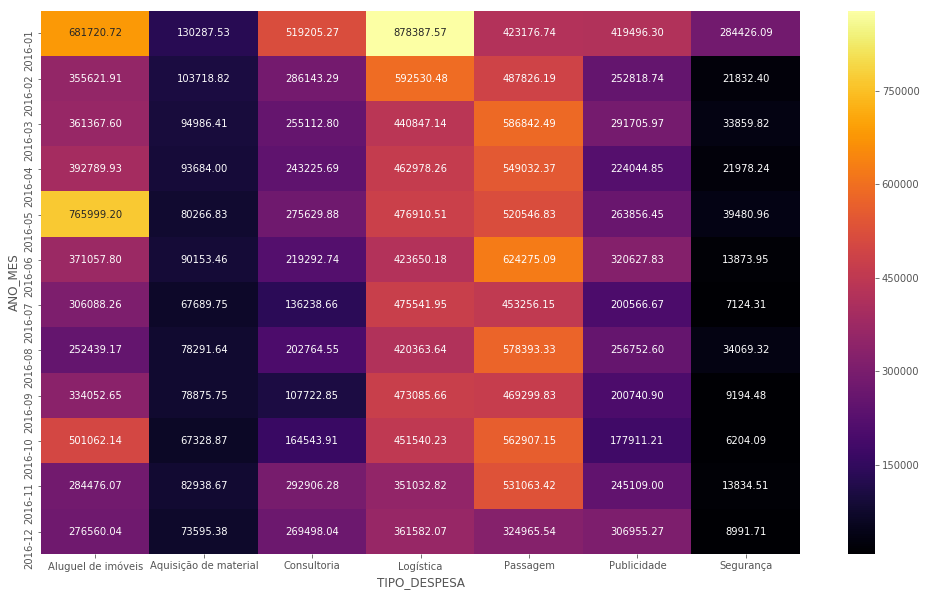

In [86]:
plt.figure(figsize=(17,10))
sns.heatmap(pivot_df, annot=True, fmt='.2f',cmap ='inferno')

In [65]:
df[]
df.loc[df['ANO_MES'] == '1977-10',["ANO"]]

,ANO
17928,2016


In [62]:
df.iloc[1000]

ANO                                                               2016
MES                                                                 10
DIA                                                                 10
SENADOR                                                    ALVARO DIAS
TIPO_DESPESA                                                  Passagem
CNPJ_CPF                                            16.978.175/0001-08
FORNECEDOR                                     Ádria Viagens e Turismo
DOCUMENTO                                                       0E3833
DATA                                               2016-06-10 00:00:00
DETALHAMENTO         Companhia Aérea: Passaredo Transportes Aéreos,...
VALOR_REEMBOLSADO                                               450.76
MAIOR_QUE_100                                                        1
ANO_MES                                                        2016-06
Name: 1000, dtype: object

In [67]:
pivot_df.loc['2016-01':'2016-12']

TIPO_DESPESA,Aluguel de imóveis,Aquisição de material,Consultoria,Logística,Passagem,Publicidade,Segurança
ANO_MES,,,,,,,
2016-01,681720.72,130287.53,519205.27,878387.57,423176.74,419496.30,284426.09
2016-02,355621.91,103718.82,286143.29,592530.48,487826.19,252818.74,21832.40
2016-03,361367.60,94986.41,255112.80,440847.14,586842.49,291705.97,33859.82
2016-04,392789.93,93684.00,243225.69,462978.26,549032.37,224044.85,21978.24
2016-05,765999.20,80266.83,275629.88,476910.51,520546.83,263856.45,39480.96
2016-06,371057.80,90153.46,219292.74,423650.18,624275.09,320627.83,13873.95
2016-07,306088.26,67689.75,136238.66,475541.95,453256.15,200566.67,7124.31
2016-08,252439.17,78291.64,202764.55,420363.64,578393.33,256752.60,34069.32
2016-09,334052.65,78875.75,107722.85,473085.66,469299.83,200740.90,9194.48
